In [ ]:
!pip3 uninstall opencv-python
!pip3 uninstall opencv-contrib-python
!pip3 install opencv-contrib-python==3.4.18.65

Found existing installation: opencv-python 4.8.0.76
Uninstalling opencv-python-4.8.0.76:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/cv2/*
    /usr/local/lib/python3.10/dist-packages/opencv_python-4.8.0.76.dist-info/*
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libQt5Core-39545cc7.so.5.15.0
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libQt5Gui-a7aedf18.so.5.15.0
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libQt5Test-c38a5234.so.5.15.0
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libQt5Widgets-e69d94fb.so.5.15.0
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libQt5XcbQpa-5b2d853e.so.5.15.0
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libX11-xcb-69166bdf.so.1.0.0
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libXau-00ec42fe.so.6.0.0
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libavcodec-402e4b05.so.59.37.100
    /usr/local/lib/py

In [ ]:
# 관련 패키지 임포트
import sys
import numpy as np
import cv2
import matplotlib.pyplot as plt

print('python', sys.version)
print('numpy', np.__version__)
print('opencv', cv2.__version__)

python 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
numpy 1.25.2
opencv 3.4.18


In [ ]:
# mount
from google.colab import drive
drive.mount('/content/drive')
ROOT = '/content/drive/My Drive/Colab Notebooks/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


좌측의 파일 아이콘을 선택하거나 아래 명령어를 통해 파일을 확인할 수 있다.

In [ ]:
!ls '/content/drive/My Drive/Colab Notebooks/'

 AutoEncoder.ipynb
 chromedriver.exe
'Computer Vision Masterclass - Face detection.ipynb'
'Computer Vision Masterclass - Face recognition.ipynb'
 DeepDream.ipynb
 DPP_0010.JPG
 DPP_0011.JPG
 DPP_0013.JPG
'Feature Detection'
 GANS.ipynb
 gesture_detect.ipynb
 Neural_network_for_image_classification.ipynb
 Segmenration.ipynb
 stopwords-kr.txt
 StyleTransfer.ipynb
 TransferLearning.ipynb
 Untitled0.ipynb
 Yolo_Detection.ipynb


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ROOT = '/content/drive/My Drive/Colab Notebooks/'

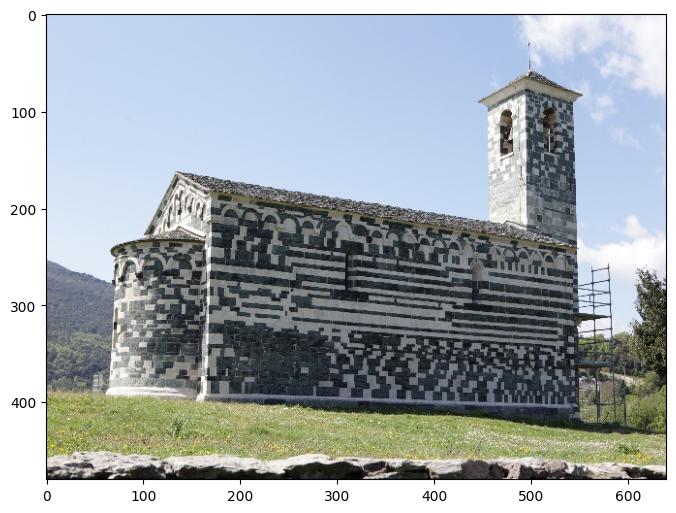

In [ ]:
img = cv2.imread( ROOT + '/DPP_0010.JPG')

plt.figure(figsize=(8,8))
plt.imshow(img[:,:,::-1])
plt.show()

![image.png](https://wikidocs.net/images/page/231809/opencv_BorderTypes.png)  
Harris Corner에서 BorderType은 커널 기반 연산에서 가장자리를 어떻게 연산할지를 정하는 파라미터이다.  
그림과 같이 여러 방법이 존재한다.  
Harris Corner에서는 cv2.BORDER_DEFAULT는 cv2.BORDER_REFLECT_101과 같다.
  
이미지 출처 : wikidocs

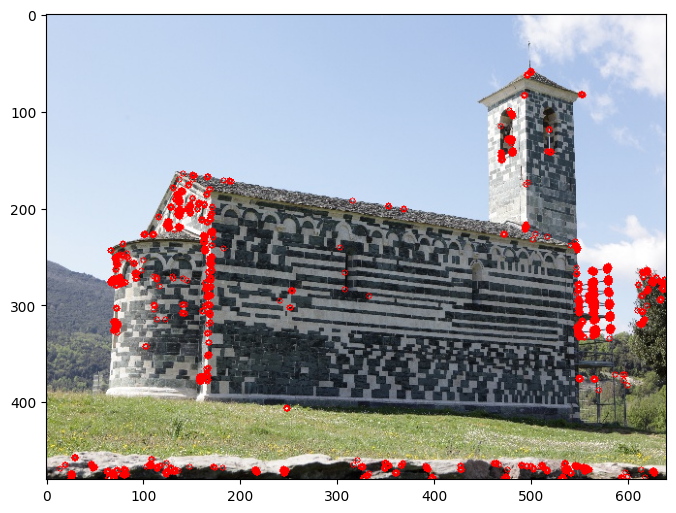

1444


In [ ]:
img = cv2.imread( ROOT + '/DPP_0010.JPG')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# To-do
Harris = cv2.cornerHarris(gray, 3, 3, 0.04, borderType = cv2.BORDER_DEFAULT)
#각 픽셀마다 커널의 범위에 대하여 픽셀값의 변화량을 구한다.
threshold = 0.09 * Harris.max()
#픽셀값의 변화량이 가장 큰 값에 실수배를 하여 코너라고 판단할 픽셀값의 변화량 정도를 설정한다

#파라미터
#threshold의 가중치 : 커질수록 corner 검출이 줄어들고(누가 봐도 corner임) 작을수록 corner 검출이 늘어난다(좀 아니다 싶은 것도 corner로 검출).

#blocksize : 3일 때 1444개, 5일 때 2615, 7일 때 5378개
#block size가 커질수록 더 넓은 범위를 고려하여 코너를 검출한다.(연산 시간이 길어짐)
#block size가 커질수록 넓은 관점에서 corner가 모서리의 형태로 검출될 가능성이 크다. 단, 너무 커지면 실제 corner가 아닌 것을 corner로 검출할 수 있음
#block size가 작을수록 좁은 범위 내의 노이즈에 민감할 수 있다.

#ksize : 3일 때 1444개, 5일 때 1067개, 7일 때 1096개, 9일 때 1099개
#ksize의 변화에 따라 corner 검출의 개수가 비례하지 않는 듯하다.
#ksize가 커질수록 픽셀변화량을 계산할 때 고려하는 범위가 넓이지기 때문에 노이즈에 강해지지만 디테일한 경계를 놓칠 수 있다.

#k : 0.03일 때 1555개, 0.04일 때 1444개, 0.05 일 때 1344개
#k 값이 클수록 코너 검출의 개수가 줄어든다
#harris corner는 corner를 검출할 때 x방향으로의 변화와 y방향으로의 변화를 고려한다
#만약 x혹은 y중 하나의 변화량만 크다면 k값이 커질수록 corner로 검출되지 않을 수 있고
#    x와 y 둘 다 변화량이 비슷하게 충분히 크다면 k값이 커져도 corner로 검출될 확률이 높아진다.


counter = 0
for y in range(Harris.shape[0]):
    for x in range(Harris.shape[1]):
        if Harris[y, x] > threshold:
            cv2.circle(img, (x, y), 3, (0, 0, 255), 1) # corner라고 판단되는 점에 circle 그리기
            counter += 1

plt.figure(figsize=(8,8))
plt.imshow(img[:,:,::-1])
plt.show()
print(counter)

2006


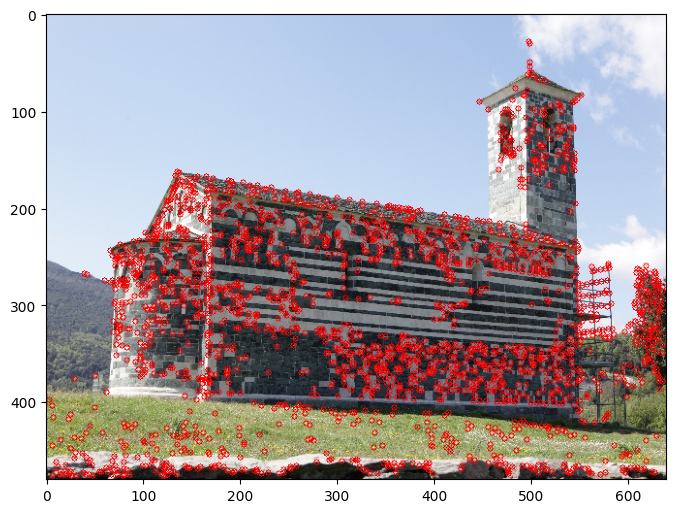

In [ ]:
img = cv2.imread( ROOT + '/DPP_0010.JPG')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

Fast = cv2.FastFeatureDetector_create(60, True, cv2.FAST_FEATURE_DETECTOR_TYPE_9_16)
#주변에 위치한 픽셀들 중 기준 픽셀과의 값 차이가 임계값 이상인 픽셀이 충분히 많다면 기준 픽셀이 corner로 검출된다.
#보통 인접한 픽셀 16개 중에 9개 이상이어야 한다.

#파라미터
#threshold : corner로 판단할 임계값을 정한다.
#threshold가 1일 때 15846개, 60일 때 2006개, 255일 때 0개
#threshold 값이 작을수록 민감하게 corner를 검출한다.

#nonmaxSupperssion : corner검출점이 뭉쳐있을 경우 그 무리 중에 가장 뚜렷한 코너 하나만 선택한다.
#True일 때 2006개 False일 때 4588개
#True일 때는 최소한의 간격에 따라 corner가 검출되고 False일 때는 corner가 더 많이 검출되고 corner가 뭉쳐있는 부분이 보인다.

#type : 8개 중에 5개가 threshold를 넘김, 9개 중에 16개가 threshold를 넘김 등등
#5-8(5/8=0.625)이면 70개, 7-12(7/12=0.583)이면 1356개, 9-16(9/16=0.562)이면 2006개
#type에서 주변 픽셀 중에 threshold를 넘겨야 하는 픽셀의 비율의 클수록 corner 검출의 개수가 작아진다.
#단 사용하는 이미지의 특성에 따라 달라질 수 있다.

points = Fast.detect(gray)
print(len(points))
for p in points:
    pt = (int(p.pt[0]), int(p.pt[1]))
    cv2.circle(img, pt, 3, (0, 0, 255), 1)

plt.figure(figsize=(8,8))
plt.imshow(img[:,:,::-1])
plt.show()

(500, 32)
0.0316


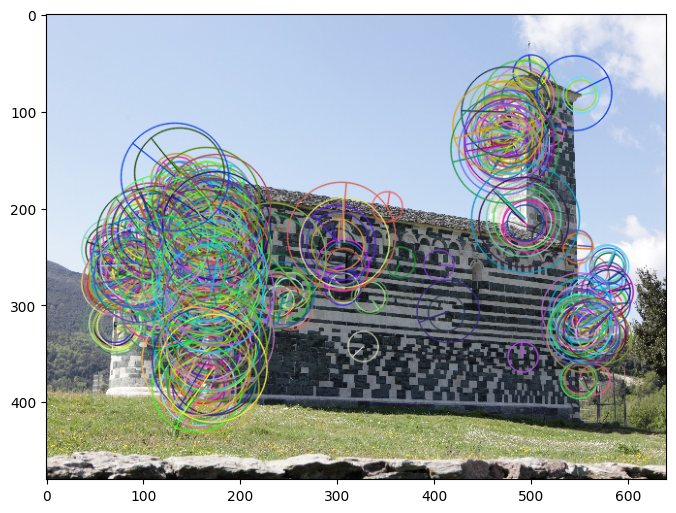

In [ ]:
img = cv2.imread( ROOT + '/DPP_0010.JPG')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# To-do
#Orb = cv2.ORB_create(nfeatures=500, scaleFactor=1.2, nlevels=8,
#                    edgeThreshold=31,firstLevel=0, WTA_K=2, scoreType=cv2.ORB_HARRIS_SCORE, patchSize=31, fastThreshold=20)
Orb = cv2.ORB_create(nfeatures=500, scaleFactor=1.2, nlevels=8,
                     edgeThreshold=31,firstLevel=0, WTA_K=2, scoreType=cv2.ORB_HARRIS_SCORE, patchSize=31, fastThreshold=20)

#scaleFactor : 1.1일 때 0.0085 / 1.2일 때 0.0068 / 1.3일 때 0.0050 / 1.5일 때 0.0042 / 1.7일 때 0.0035 / 1.9일 때 0.0033
#scaleFactor가 클수록 다음 스케일 피라미드 layer로 이동할 때마다 이미지의 크기가 급격히 줄어서 연산량이 줄어들고 빨라진다.

#nlevels : 6일 때 0.0064 / 8일 때 0.0068 / 10일 때 0.0071
#nlevels이 작을수록 연산해야하는 스케일 피라미드 layer의 개수가 작아지므로 빨라진다.

#edgeThreshold : 31일 때 0.0068, 21일 때 0.0066, 41일 때 0.0068
#FAST알고리즘의 Edge를 판단하는 파라미터이기 때문에 시간과 관계없음

#firstLevel : 0일 때 0.0068, 1일 때 0.0088, 2일 때 0.0114, 3일 때 0.0156
#시작하는 level이 작을수록 더 큰 이미지에 대해 연산을 해야해서 느릴 것으로 예상했지만
#실제로는 level이 작을수록 더 빨랐다.
#그 이유는 작은 크기의 이미지(저해상도 이미지)에서 검출한 특징점을
#큰 이미지(고해상도 이미지)에 매핑하는 연산이 추가되기 때문이다.

#WTA_K : 2일 때 0.0068, 3일 때 0.0073 , 4일 때 0.0072
#WTA는 무작이 k개의 픽셀을 뽑은 다음 그들 중 가장 밝은 픽셀만 남기는 것이다.
#노이즈, 스케일, 회전 등의 변수에 강건해진다는 장점이 있다.
#실행시간에 큰 영향을 주진 못한다.

#scoreType : Harris검출일 때 0.0068 / FastScore일 때 0.0066
#각 특징점이 전체 이미지에서 얼마나 특출난 픽셀인지 검사하는 알고리즘
#사용할 수 있는 알고리즘은 Harris와 Fast가 있다.
#Fast일 때 약간 빠르지만 큰 차이는 없다.

#patchSize : 31일 때 0.0068 / 21일 때 0.0065 / 41일 때 0.0067
#patchSize가 클수록 더 넓은 영역을 고려해서 특징을 검출한다.
#patchSize가 작을수록 계산의 복잡성이 줄어들 수 있지만 실제로 큰 차이는 없었다.

#fastThreshold : 10일 때 0.0093 / 20일 때 0.0068 / 30일 때 0.0055
#fastThreshold는 특징점을 검출하는 알고리즘(harris나 fast)의 계산 결과 값이 임계값을 넘어야 함
#임계값이 클수록 전체적으로 고려해야하는 특징점의 개수가 줄어들기 때문에 연산 속도가 빨라진다.


time_list = []
for i in range(10):
    #시간 측정 : 네트워크같은 변수를 제거하기 위해 해당 코드는 로컬에서 실행함
    start = cv2.getTickCount()
    # 키 포인트 검출 및 디스크립터 계산
    points, descriptor = Orb.detectAndCompute(img, None)
    # 연산 시간 측정 종료
    end = cv2.getTickCount()
    time = (end - start) / cv2.getTickFrequency()  # 초 단위로 계산
    time_list.append(time)
print(descriptor.shape)
print(f"{sum(time_list)/10:.4f}")
img = cv2.drawKeypoints(img, points, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)



plt.figure(figsize=(8,8))
plt.imshow(img[:,:,::-1])
plt.show()

In [ ]:
# 아래 패키지를 임포트한다
!pip install opencv-contrib-python-nonfree

ERROR: Could not find a version that satisfies the requirement opencv-contrib-python-nonfree (from versions: none)
ERROR: No matching distribution found for opencv-contrib-python-nonfree


(2482, 128) [[  0.   0.   0. ...  53.  25.   9.]
 [  0.   0.   0. ...  22.   6.  58.]
 [104. 124.   4. ...   0.   1.  34.]
 ...
 [ 69.  31.  17. ...   0.   0.   0.]
 [ 12.   0.   0. ...  10.  41.  24.]
 [ 29.   3.   9. ...   0.   0.   0.]]


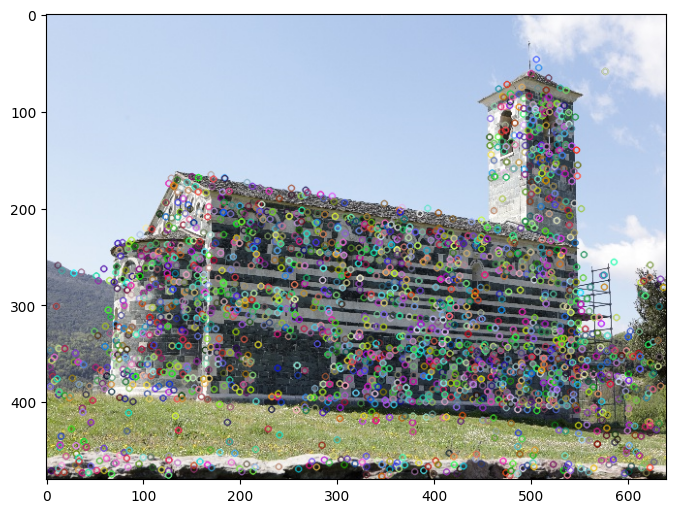

In [ ]:
img = cv2.imread( ROOT + '/DPP_0010.JPG')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# To-do
#특징점을 중심으로 4*4개의 윈도우로 영역을 나눈다.
#윈도우별로 8개의 각도에 대해 그래디언트 벡터를 구한다.
#그래디언트 벡터는 특징점의 주변값을 표현하는 것이다.
#그러면 16개의 윈도우의 8개의 각도만큼의 그래디언트 벡터(128개)가 산출된다.
#즉 특징점 주변에 대한 정보가 128차원의 벡터로 표현된다.
#SIFT는 이 방식을 기반으로 크기와 회전에 강한 특징을 추출하도록 설계되었다
#먼저 스케일 피라미드를 이용한다.
#스케일 피라미드는 크기에 상관없이 특징점을 추출하기 위해 이미지를 점차 줄여나가면서 특징점을 반복적으로 찾는다.
#그다음으로 특징점 주변을 36등분하여 그래디언트를 구하고 그래디언트의 크기가 가장 큰 방향이 특징점의 방향이며 그 크기가 특징점의 크기가 된다.


Sift = cv2.SIFT_create(nfeatures=0, nOctaveLayers=3, contrastThreshold=0.04, edgeThreshold=10, sigma=2.0)
#파라미터

#nfeatures : point의 개수를 설정, 0으로 하면 가능한한 많은 포인트를 자동으로 검출

#nOctaveLayers : 옥타브 개수, 스케일 피라미드에 사용할 layer의 개수
#3일 때 3188개 / 2일 때 2718개 / 1일 때 1941개 / 4일 때 3621개 / 5일 때 4038개 / 6일 때 4345개
#다양한 스케일에서의 변화를 검출하기 때문에 nOctaveLayers값이 클수록 더 많은 특징점이 나타난다.

#contrastThreshold : 이 값이 클수록 명백히 코너인 점만 검출된다.
#0.02일 때 3459개 / 0.04일 때 3188개 /  0.06일 때 2857개

#edgeThreshold : 이 값이 클수록 edge까지 포함하여 특징점을 검출하고 이 값이 작을수록 edge를 제외한 특징점을 검출한다.
#edge란 픽셀값이 변하는 경계선이다. 특징점은 point의 형태인 반면 edge는 line의 형태이다.
#10일 때 3188개 / 5일 때 2496개 / 15일 때 3464

#sigma : 스케일 피라미드의 첫번째 layer(0 계층)에서 사용하는 가우시안 필터의 시그마 값
#사전에 노이즈를 제거한다.
#sigma값이 너무 크면 디테일한 특징점을 검출하지 못할 가능성이 크다.
#1.6일 때 3188개 / 1.4일 때 3460개 / 1.2일 때 4186개 / 1.8일 때 2788개 / 2.0일 때 2482개
#sigma값이 클수록 이미지의 노이즈가 제거되면서 전반적으로 평활화 되므로 특징점이 적게 검출된다.

points, descriptor = Sift.detectAndCompute(gray,None)
print(descriptor.shape, descriptor)
img = cv2.drawKeypoints(img, points, img)
plt.figure(figsize=(8,8))
plt.imshow(img[:,:,::-1])
plt.show()

In [ ]:
img1_path = ROOT + '/DPP_0010.JPG'
img2_path = ROOT + '/DPP_0011.JPG'
img1 = cv2.imread(img1_path, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(img2_path, cv2.IMREAD_GRAYSCALE)

#정확도를 비교하기 위해
# 1. 추출한 특징점들 중 몇개가 실제로 매칭되었는가(매칭비율)
# 2. 매칭된 특징점들 사이의 거리(평균거리)
# 를 측정한다.
# SIFT와 ORB만 descriptor를 지원하기 때문에 BFMatcher를 사용하여 계산한다.

def compute_score(matches, kp1, kp2):
    if not matches:
        return 0.0
    match_ratio = len(matches) / min(len(kp1), len(kp2))

    min_distance = min(m.distance for m in matches)
    average_distance = np.mean([ (m.distance-min_distance) for m in matches])
    return [match_ratio, average_distance]

def descriptor_match(descriptor):
  kp1, des1 = descriptor.detectAndCompute(img1, None)
  kp2, des2 = descriptor.detectAndCompute(img2, None)

  bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

  matches = bf.match(des1, des2)
  matches = sorted(matches, key = lambda x:x.distance)
  return matches, kp1, kp2


orb = cv2.ORB_create()
sift = cv2.SIFT_create()

matches, kp1, kp2 = descriptor_match(orb)
score = compute_score(matches, kp1, kp2)
print(f"Computed orb Score: {score[0]:.4f} {score[1]:.4f}")

matches, kp1, kp2 = descriptor_match(sift)
score = compute_score(matches, kp1, kp2)
print(f"Computed sift Score: {score[0]:.4f} {score[1]:.4f}")


Computed orb Score: 0.3700 201.9905
Computed sift Score: 0.5083 147.2790


다음은 각 알고리즘을 표 형식으로 비교한 것이다.


|      특성       |   SIFT   |     ORB     |              FAST              |          Harris          |
|:---------------:|:--------:|:-----------:|:------------------------------:|:------------------------:|
|     매칭비율     |  0.5083  |   0.3700    | 구체적인 수치를 산출할 수 없지만 | 구체적인 수치를 산출할 수 없음 |
|     매칭거리     | 147.2790 |  201.9905   |  가장 정확도가 낮은 것으로 알려져 있음  |   FAST보다는 우수한 정확도를 보임   |
|      속도       |   느림    |   약간빠름   |              빠름              |         약간 느림         |
| 로테이션 불변성 |   보장    |    보장     |           보장못함            |         보장못함         |
|   스케일 불변성  |   보장    | 제한적으로 보장 |           보장못함            |         보장못함         |
